In [65]:
import os
_ROOT_PATH = os.path.join('..', '..', '..')
_OPTIM_DIR = os.path.join(_ROOT_PATH, 'experiments', 'optim_ablation')

import sys
sys.path.append('..')
sys.path.append(os.path.join('..', '..', '..', 'tools'))
import plotconfig

In [66]:
import file_tools
import saving_tools
import face_tools

In [67]:
import matplotlib.pyplot as plt

from scipy.spatial import distance
import pandas as pd
import numpy as np
import pickle

result_df = pd.DataFrame()

fs = file_tools.list_files(_OPTIM_DIR, "*.json")
for f in fs:
    d = saving_tools.load_dict_from_json(f)
    df_filename = os.path.join(_ROOT_PATH, d['df_filename'])

    df = pd.read_parquet(df_filename, engine='pyarrow')
    df['method_name'] = d['method_name']
    df['ablation_distance'] = d['ablation_distance']
    df['run_type'] = d['run_type']

    target_data = np.load(d['target_filename'])
    target_face = target_data['target_face']

    params_columns = ['params_x0', 'params_x1', 'params_x2', 'params_x3', 'params_x4', 
                  'params_x5', 'params_x6', 'params_x7', 'params_x8', 'params_x9']
    params_array = df[params_columns].to_numpy()

    pca_face_filename = os.path.join(_ROOT_PATH, d['pca_face_filename'])
    with open(pca_face_filename, 'rb') as file:
        pca_face = pickle.load(file)
    tested_faces = pca_face.inverse_transform(params_array)
    
    euclidean_distances = np.array([distance.euclidean(target_face, row) for row in tested_faces])
    df['euclidean_distance'] = euclidean_distances
    
    columns_to_keep = ['number', 'value', 'method_name', 'euclidean_distance', 'ablation_distance', 'run_type']
    new_df = df[columns_to_keep]
    
    result_df = pd.concat([result_df, new_df], ignore_index=True)

In [15]:
result_df

,number,value,method_name,euclidean_distance,ablation_distance,run_type,combined
0,0,1.001116,LinearRegression,35.417520,5,control,control-0 5\n1 5\n2 5\...
1,1,1.013322,LinearRegression,13.764862,5,control,control-0 5\n1 5\n2 5\...
2,2,1.010400,LinearRegression,14.320040,5,control,control-0 5\n1 5\n2 5\...
3,3,1.012149,LinearRegression,11.878738,5,control,control-0 5\n1 5\n2 5\...
4,4,1.005272,LinearRegression,17.256354,5,control,control-0 5\n1 5\n2 5\...
...,...,...,...,...,...,...,...
99995,2495,1.012892,LinearRegression,3.676976,10,ablation,ablation-0 5\n1 5\n2 5...
99996,2496,1.014181,LinearRegression,3.802906,10,ablation,ablation-0 5\n1 5\n2 5...
99997,2497,1.009709,LinearRegression,3.811058,10,ablation,ablation-0 5\n1 5\n2 5...
99998,2498,1.011607,LinearRegression,3.776990,10,ablation,ablation-0 5\n1 5\n2 5...


<Axes: xlabel='number', ylabel='value'>

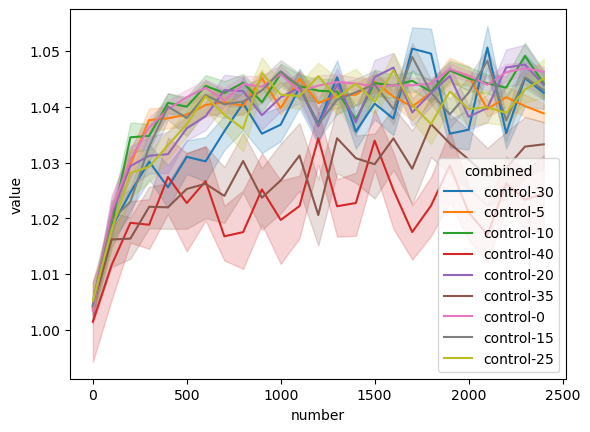

In [70]:
import seaborn as sns

result_df['str_ablation_distance'] = result_df['ablation_distance'].astype(str)
result_df['combined'] = result_df['run_type'] + '-' + result_df['str_ablation_distance']


# Define the interval for subsampling
interval = 100
numbers_to_keep = list(range(0, result_df['number'].max() + 1, interval))
subsampled_df = result_df[result_df['number'].isin(numbers_to_keep)]

# mask = ((subsampled_df['run_type'] == "ablation"))
mask = ((subsampled_df['run_type'] == "control"))
subsampled_df = subsampled_df[mask]

sns.lineplot(data=subsampled_df, x='number', y='value', hue='combined')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


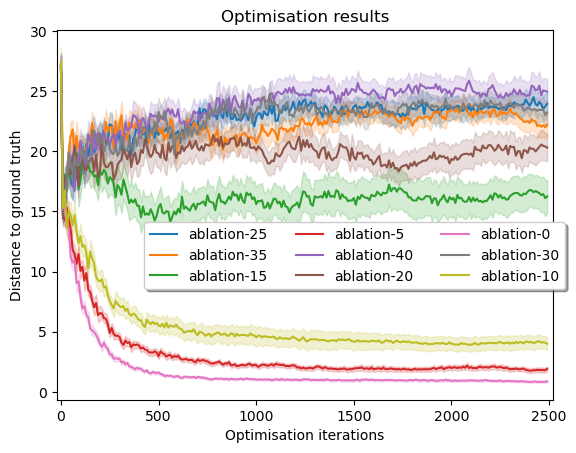

In [79]:
import seaborn as sns

# Define the interval for subsampling
interval = 10
numbers_to_keep = list(range(0, result_df['number'].max() + 1, interval))
subsampled_df = result_df[result_df['number'].isin(numbers_to_keep)]

mask = ((subsampled_df['run_type'] == "ablation"))
# mask = ((subsampled_df['run_type'] == "control"))
subsampled_df = subsampled_df[mask]

ax = sns.lineplot(data=subsampled_df, x='number', y='euclidean_distance', hue='combined', errorbar='se')

ax.legend(loc='upper center', bbox_to_anchor=(0.6, 0.50),
          ncol=3, fancybox=True, shadow=True)


plt.xlabel('Optimisation iterations')
plt.ylabel('Distance to ground truth')
plt.title('Optimisation results')

plt.xlim([-20, 2520])
# plt.ylim([0, 5])

# Save as high-definition
fbasename = "optim_ablation"
plt.gcf().savefig(f'{fbasename}.png', format='png', dpi=300, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.svg', format='svg', dpi=1200, bbox_inches='tight')

In [35]:
distance.euclidean(target_face, pca_face.inverse_transform([-1]*10))

3.167085732249024

,x,y,var1,var2,combined
0,1,2,A,This is a long text,A-This is a
1,2,3,A,Another long text,A-Another lo
2,3,4,B,Short,B-Short
3,4,5,B,Text,B-Text
4,5,4,C,Extra long text here,C-Extra long
5,6,3,C,Final long description,C-Final long


,number,value,datetime_start,datetime_complete,duration,params_x0,params_x1,params_x2,params_x3,params_x4,...,system_attrs_cma:n_restarts,system_attrs_cma:n_restarts_with_large,system_attrs_cma:optimizer:0,system_attrs_cma:optimizer:1,system_attrs_cma:optimizer:2,system_attrs_cma:optimizer:3,system_attrs_cma:popsize,system_attrs_cma:poptype,system_attrs_cma:small_n_eval,state
0,0,1.001617,2024-08-04 16:14:41.414925,2024-08-04 16:14:41.581919,0 days 00:00:00.166994,6.365118,13.939017,-14.892927,-11.453155,1.982733,...,NaN,NaN,None,None,None,None,NaN,None,NaN,COMPLETE
1,1,1.002468,2024-08-04 16:14:41.582581,2024-08-04 16:14:41.741498,0 days 00:00:00.158917,-3.010982,-4.583702,7.378809,-12.053623,-5.348912,...,0.0,0.0,None,None,None,None,10.0,small,0.0,COMPLETE
2,2,1.005774,2024-08-04 16:14:41.742112,2024-08-04 16:14:41.905856,0 days 00:00:00.163744,4.895941,-2.628980,1.989581,7.341791,6.769870,...,0.0,0.0,None,None,None,None,10.0,small,0.0,COMPLETE
3,3,1.003260,2024-08-04 16:14:41.906435,2024-08-04 16:14:42.035735,0 days 00:00:00.129300,-0.073524,-3.850291,-2.160169,-0.969155,-0.744462,...,0.0,0.0,None,None,None,None,10.0,small,0.0,COMPLETE
4,4,1.001717,2024-08-04 16:14:42.036302,2024-08-04 16:14:42.176408,0 days 00:00:00.140106,4.883602,5.519527,-0.016831,1.714960,1.428684,...,0.0,0.0,None,None,None,None,10.0,small,0.0,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,1.012892,2024-08-04 16:20:48.114080,2024-08-04 16:20:48.277718,0 days 00:00:00.163638,0.848177,-1.417249,0.398456,1.281918,-0.807439,...,0.0,0.0,None,None,None,None,10.0,small,0.0,COMPLETE
2496,2496,1.014181,2024-08-04 16:20:48.278868,2024-08-04 16:20:48.417348,0 days 00:00:00.138480,0.835280,-1.394841,0.340035,1.443045,-0.675993,...,0.0,0.0,None,None,None,None,10.0,small,0.0,COMPLETE
2497,2497,1.009709,2024-08-04 16:20:48.418436,2024-08-04 16:20:48.556090,0 days 00:00:00.137654,0.883036,-1.313163,0.379884,1.361837,-0.692480,...,0.0,0.0,None,None,None,None,10.0,small,0.0,COMPLETE
2498,2498,1.011607,2024-08-04 16:20:48.557179,2024-08-04 16:20:48.690819,0 days 00:00:00.133640,0.753682,-1.235437,0.234865,1.441930,-0.695796,...,0.0,0.0,None,None,None,None,10.0,small,0.0,COMPLETE
